# ELECTRICITY PRICE PREDICTION

## IMPORT THE NECESSARY PACKAGES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## LOAD THE DATASET 

In [2]:

data = pd.read_csv("Electricity.csv")


C:\Users\SANJAY\AppData\Local\Temp\ipykernel_4424\3962053405.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Electricity.csv")


## EXPLORE THE DATASET

In [3]:
data.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [5]:
data.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000


In [6]:
data.shape

(38014, 18)

In [7]:
data.isnull().sum()

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        0
SystemLoadEA                  0
SMPEA                         0
ORKTemperature                0
ORKWindspeed                  0
CO2Intensity                  0
ActualWindProduction          0
SystemLoadEP2                 0
SMPEP2                        0
dtype: int64

## DATA PRE-PROCESSING 

In [8]:
data_cleaned =data.dropna()

data_cleaned.info()

data_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1536 entries, 2544 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                1536 non-null   object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             1536 non-null   int64 
 3   DayOfWeek               1536 non-null   int64 
 4   WeekOfYear              1536 non-null   int64 
 5   Day                     1536 non-null   int64 
 6   Month                   1536 non-null   int64 
 7   Year                    1536 non-null   int64 
 8   PeriodOfDay             1536 non-null   int64 
 9   ForecastWindProduction  1536 non-null   object
 10  SystemLoadEA            1536 non-null   object
 11  SMPEA                   1536 non-null   object
 12  ORKTemperature          1536 non-null   object
 13  ORKWindspeed            1536 non-null   object
 14  CO2Intensity            1536 non-null   object
 15  Actua

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,1536.0,1536.00000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000
mean,1.0,1.78125,27.875000,17.718750,7.468750,2012.312500,23.500000
std,0.0,2.23308,18.944802,11.024122,4.032321,0.682017,13.857911
min,1.0,0.00000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,1.0,0.00000,13.000000,6.000000,4.000000,2012.000000,11.750000
50%,1.0,0.50000,21.000000,24.000000,7.000000,2012.000000,23.500000
75%,1.0,4.00000,51.250000,26.500000,12.000000,2013.000000,35.250000
max,1.0,6.00000,52.000000,31.000000,12.000000,2013.000000,47.000000


### DATA CLEANING 

In [9]:
data_new =data_cleaned.drop(['SystemLoadEA'],axis = 1)
data_new.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
2544,24/12/2011 00:00,Christmas Eve,1,5,51,24,12,2011,0,718.70,44.96,2.00,11.10,477.20,666.00,3634.24,44.96
2545,24/12/2011 00:30,Christmas Eve,1,5,51,24,12,2011,1,741.10,44.54,3.00,18.50,467.15,641.00,3382.16,44.96
2546,24/12/2011 01:00,Christmas Eve,1,5,51,24,12,2011,2,768.00,42.73,3.00,16.70,469.53,644.00,3204.06,44.54
2547,24/12/2011 01:30,Christmas Eve,1,5,51,24,12,2011,3,806.90,41.72,4.00,14.80,467.95,645.00,2997.83,43.48
2548,24/12/2011 02:00,Christmas Eve,1,5,51,24,12,2011,4,845.90,41.56,3.00,11.10,470.66,693.00,2831.80,41.72


In [10]:
data_new.reset_index(drop=True, inplace=True)

#### AFTER PRE-PROCESSING THE DATA WILL BE LIKE THIS

In [11]:
data_new.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,24/12/2011 00:00,Christmas Eve,1,5,51,24,12,2011,0,718.70,44.96,2.00,11.10,477.20,666.00,3634.24,44.96
1,24/12/2011 00:30,Christmas Eve,1,5,51,24,12,2011,1,741.10,44.54,3.00,18.50,467.15,641.00,3382.16,44.96
2,24/12/2011 01:00,Christmas Eve,1,5,51,24,12,2011,2,768.00,42.73,3.00,16.70,469.53,644.00,3204.06,44.54
3,24/12/2011 01:30,Christmas Eve,1,5,51,24,12,2011,3,806.90,41.72,4.00,14.80,467.95,645.00,2997.83,43.48
4,24/12/2011 02:00,Christmas Eve,1,5,51,24,12,2011,4,845.90,41.56,3.00,11.10,470.66,693.00,2831.80,41.72


# FEATURE ENGINEERING

In [12]:
data=data[['ForecastWindProduction',
       'SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed',
       'CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']]

In [13]:
data.isin(['?']).any()

ForecastWindProduction    True
SystemLoadEA              True
SMPEA                     True
ORKTemperature            True
ORKWindspeed              True
CO2Intensity              True
ActualWindProduction      True
SystemLoadEP2             True
SMPEP2                    True
dtype: bool

In [14]:
for col in data.columns:
    data.drop(data.index[data[col] == '?'], inplace=True)

In [15]:
data=data.apply(pd.to_numeric)
data=data.reset_index()
data.drop('index', axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37682 entries, 0 to 37681
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ForecastWindProduction  37682 non-null  float64
 1   SystemLoadEA            37682 non-null  float64
 2   SMPEA                   37682 non-null  float64
 3   ORKTemperature          37682 non-null  float64
 4   ORKWindspeed            37682 non-null  float64
 5   CO2Intensity            37682 non-null  float64
 6   ActualWindProduction    37682 non-null  float64
 7   SystemLoadEP2           37682 non-null  float64
 8   SMPEP2                  37682 non-null  float64
dtypes: float64(9)
memory usage: 2.6 MB


In [17]:
data.corrwith(data['SMPEP2']).abs().sort_values(ascending=False)

SMPEP2                    1.000000
SMPEA                     0.618158
SystemLoadEP2             0.517081
SystemLoadEA              0.491096
ActualWindProduction      0.083434
ForecastWindProduction    0.079639
ORKWindspeed              0.035436
CO2Intensity              0.035055
ORKTemperature            0.009087
dtype: float64

##  Load and Preprocess Data: 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split Data into Training and Testing Sets:

### To Machine Learning: 

In [19]:
X = data.drop(['SMPEA'], axis=1)  # Features (excluding the target)
y = data['SMPEA']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##  Build and Train the Model:

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

## Linear Regression


In [21]:
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
linear_predict=linear_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, linear_predict))

23.286827374230228

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## RandomForestRegressor

In [23]:
forest_model=RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_predict=forest_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, forest_predict)))

19.946693605562352


##  DecisionTreeRegressor

In [24]:
tree_model=DecisionTreeRegressor(max_depth=50)
tree_model.fit(X_train, y_train)
tree_predict=tree_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, tree_predict)))

29.220236120513636


## KNeighborsRegressor

In [25]:
knn_model=KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_predict=knn_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, knn_predict)))

22.878771400447835


### Make Predictions: 

In [26]:
predictions = model.predict(X_test)

## Mean square error :


In [27]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")

RMSE: 23.286827374230228


In [28]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
print(f"RMSE on Training Data: {rmse_train}")

RMSE on Training Data: 23.781779071598013


## Model evaluation 

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


RMSE: 23.286827374230228
R-squared (R²): 0.4319442483910386


## Visualize the model: 

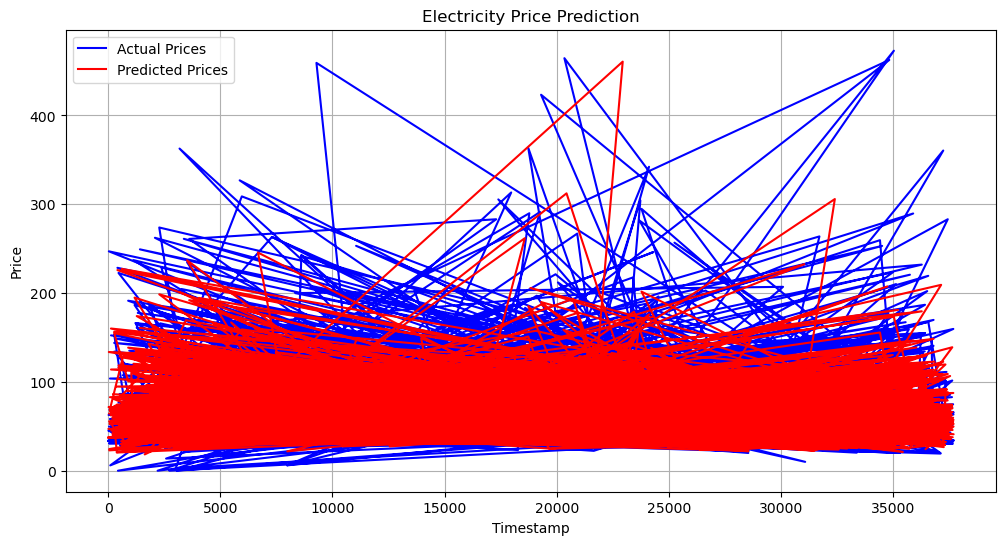

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('Electricity Price Prediction')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 0.98, 'Data Visualization for Features')

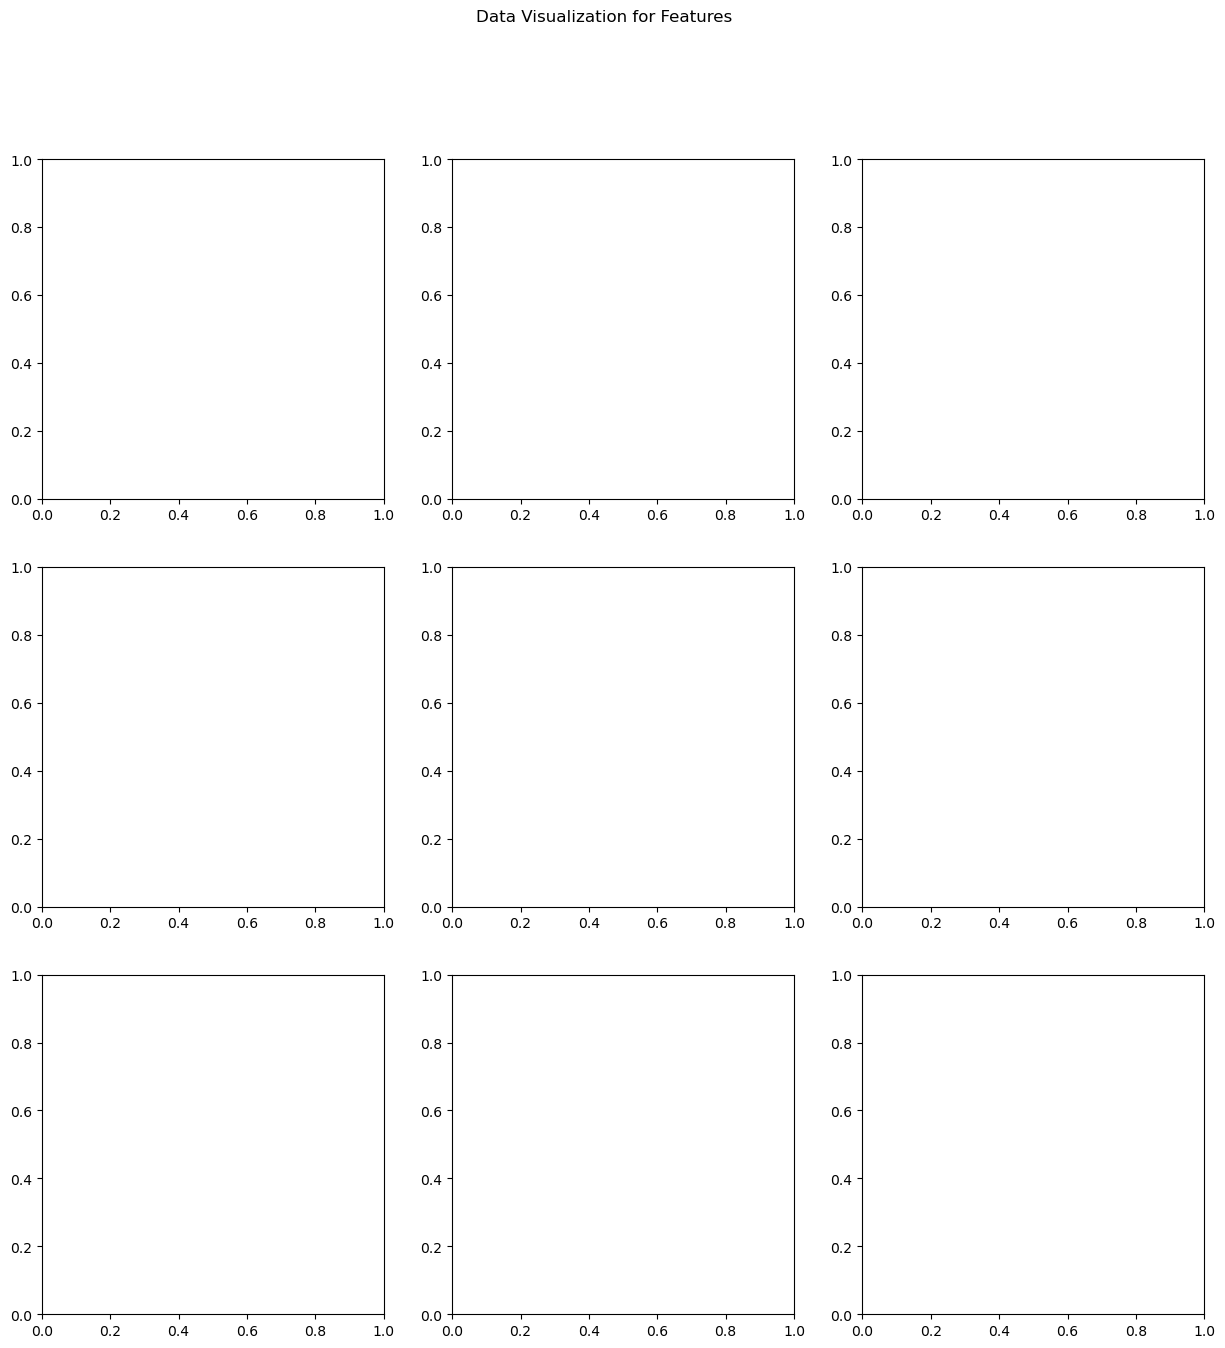

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Data Visualization for Features")

In [33]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


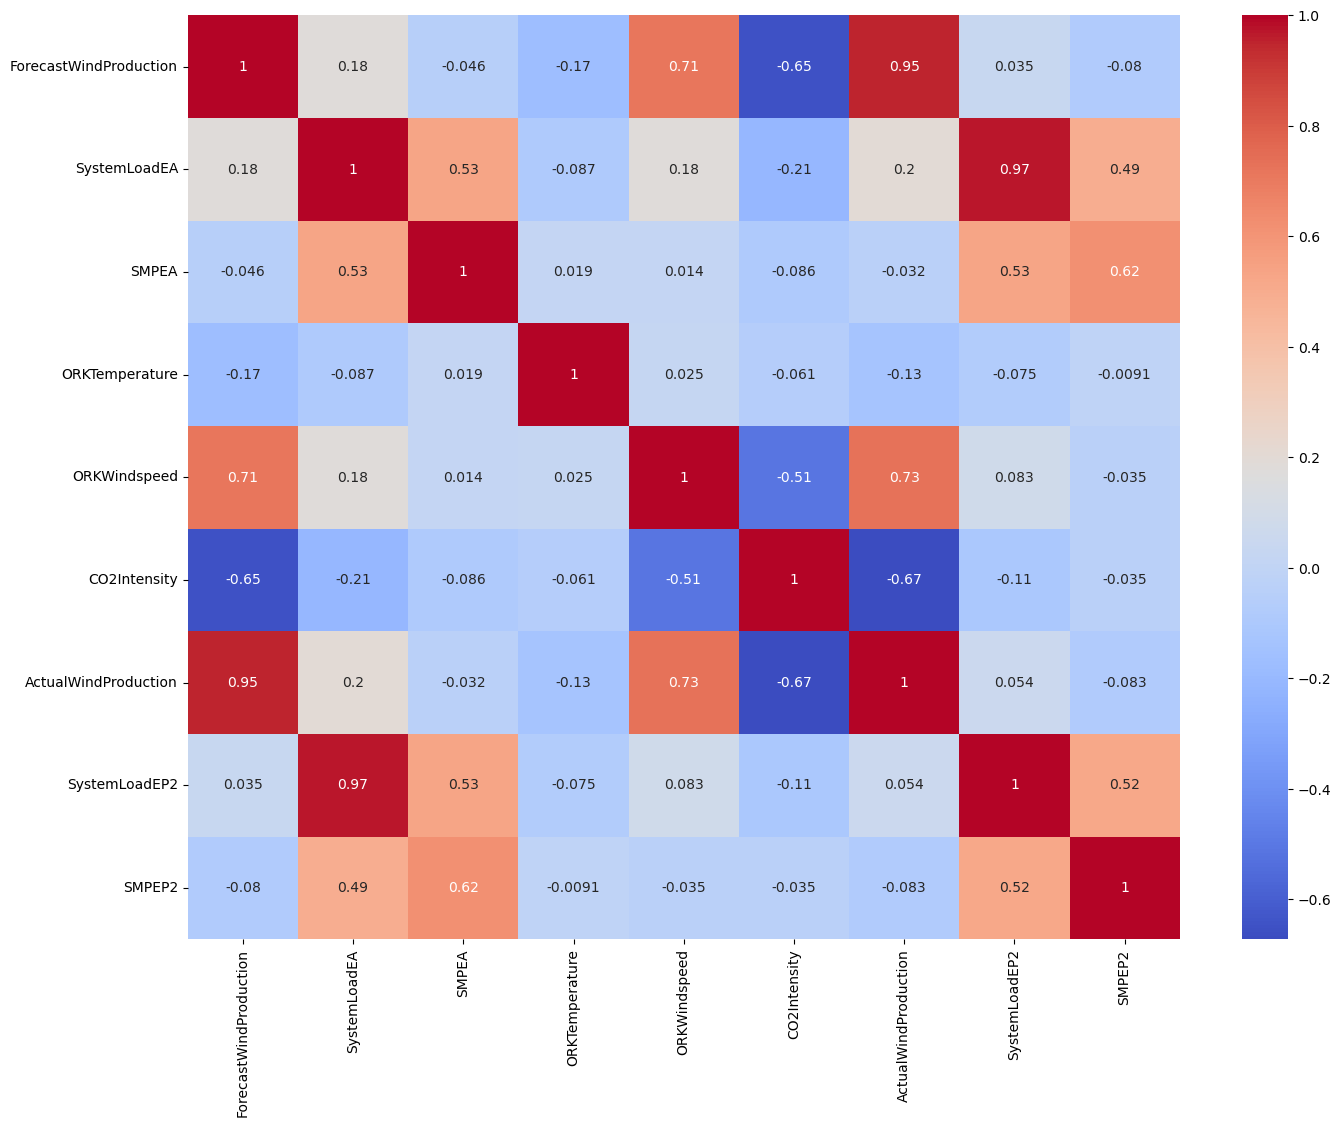

In [34]:

import seaborn as sns
import matplotlib.pyplot as plt
correlations = data.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

## Let's see how good the model is working 

In [36]:
some_data=X_test.iloc[50:60]
some_data_label=y_test.iloc[50:60]
some_predict=forest_model.predict(some_data)
pd.DataFrame({'Predict':some_predict,'Label':some_data_label})


,Predict,Label
4093,180.0896,122.47
22310,37.7334,33.78
8034,53.5364,60.91
35027,57.6949,61.36
23685,60.8775,62.09
268,51.9723,49.76
35261,46.3238,30.93
11905,64.8300,61.50
30903,67.8744,82.26
608,129.2487,119.70
